# DataScience Project 1

### DataSet Description

This [student performance dataset](http://archive.ics.uci.edu/ml/datasets/Student+Performance) approaches student achievement in secondary education of two Portuguese schools.

The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008](http://www.aabri.com/manuscripts/11939.pdf), the two datasets were modeled under binary/five-level classification and regression tasks. 

> **Important note**
> the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log
from sklearn import linear_model
from statsmodels.formula.api import ols
from numpy import exp

from mpl_toolkits.mplot3d import Axes3D

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Default Plotting Size
mpl.rc("figure", figsize=(8, 8))

# Store data in a consistent place
DATA_DIR = 'data/'
df = pd.read_csv(DATA_DIR + 'student-mat.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 29


### DataSet Attributes

| id | Attribute | Description | Data Type | Values
|----|----|----|----
| 1 | school | student's school | binary |  'GP' - Gabriel Pereira <br> 'MS' - Mousinho da Silveira
| 2 | sex | student's sex | binary |  'F' - female <br> 'M' - male
| 3 | age | student's age | numeric |  from 15 to 22
| 4 | address | student's home address type | binary |  'U' - urban <br> 'R' - rural
| 5 | famsize | family size | binary |  'LE3' - less or equal to 3 <br> 'GT3' - greater than 3
| 6 | Pstatus | parent's cohabitation status | binary |  'T' - living together <br> 'A' - apart
| 7 | Medu | mother's education | numeric |  0 - none <br> 1 - primary education (4th grade) <br> 2 - 5th to 9th grade <br> 3 - secondary education <br> 4 - higher education
| 8 | Fedu | father's education | numeric |  0 - none <br> 1 - primary education (4th grade)<br> 2 - 5th to 9th grade<br> 3 - secondary education <br> 4 - higher education
| 9 |  Mjob | mother's job | nominal |  'teacher', 'health' care related, civil 'services' <br> e.g. administrative or police, 'at_home' or 'other'
| 10|  Fjob | father's job | nominal |  'teacher', 'health' care related, civil 'services' <br> e.g. administrative or police, 'at_home' or 'other'
| 11|  reason | reason to choose this school | nominal |  close to 'home', school 'reputation', 'course' preference or 'other'
| 12|  guardian | student's guardian | nominal |  'mother', 'father' or 'other'
| 13|  traveltime | home to school travel time | numeric |  1 - &lt;15 min.<br> 2 - 15 to 30 min.<br> 3 - 30 min. to 1 hour <br> 4 - >1 hour
| 14|  studytime | weekly study time | numeric |  1 - &lt;2 hours<br> 2 - 2 to 5 hours<br> 3 - 5 to 10 hours<br>4 - &gt;10 hours
| 15|  failures | number of past class failures | numeric |  n if 1&lt;=n&lt;3, else 4
| 16|  schoolsup | extra educational support | binary |  yes or no
| 17|  famsup | family educational support | binary |  yes or no 
| 18|  paid | extra paid classes within the course subject | binary<br> Math or Portuguese  |  yes or no
| 19|  activities | extra-curricular activities | binary |  yes or no
| 20|  nursery | attended nursery school | binary |  yes or no 
| 21|  higher | wants to take higher education | binary |  yes or no 
| 22|  internet | Internet access at home | binary |  yes or no 
| 23|  romantic | with a romantic relationship | binary |  yes or no 
| 24|  famrel | quality of family relationships | numeric |  from 1 - very bad to 5 - excellent
| 25|  freetime | free time after school | numeric |  from 1 - very low to 5 - very high
| 26|  goout | going out with friends | numeric |  from 1 - very low to 5 - very high
| 27|  Dalc | workday alcohol consumption | numeric |  from 1 - very low to 5 - very high
| 28|  Walc | weekend alcohol consumption | numeric |  from 1 - very low to 5 - very high
| 29|  health | current health status | numeric |  from 1 - very bad to 5 - very good
| 30|  absences | number of school absences | numeric |  from 0 to 93

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,...,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,...,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,...,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,...,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,...,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,...,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,...,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,...,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,...,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,...,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Finding correlations

[pairplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) creates a grid of Axes such that each variable in the Pandas dataframe will by shared in the y-axis across a single row and in the x-axis across a single column. 

_The diagonal Axes are treated differently, drawing a plot to show the `univariate distribution` of the data for the variable in that column._

In [ ]:
sns.pairplot(df)

[heatmap](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html) plots a rectangular data as a color-encoded matrix.

This function tries to infer a good colormap to use from the data, but this is not guaranteed to work, so take care to make sure the kind of colormap (sequential or diverging) and its limits are appropriate.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

In [ ]:
sns.heatmap(df.corr())

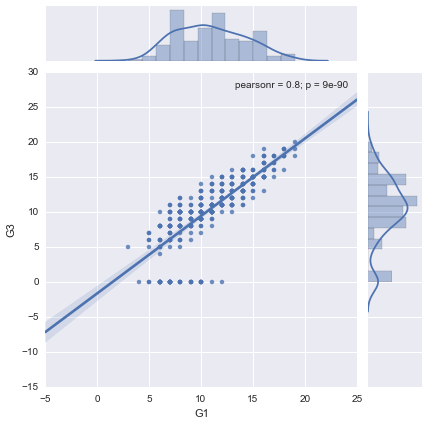

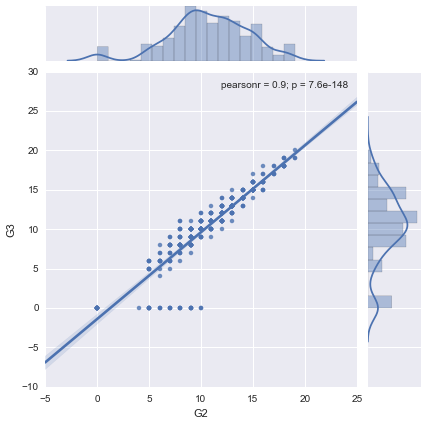

In [6]:
sns.jointplot(x="G1", y="G3", data=df, kind="reg");
sns.jointplot(x="G2", y="G3", data=df, kind="reg");

In [7]:
# Make the model object
regr = linear_model.LinearRegression()

In [17]:
# Fit the data
length = len(df['G3'].values)

g1 = [[x] for x in df['G1'].values]
g2 = [[x] for x in df['G2'].values]

predictors = [[df['G1'].values[i], df['G2'].values[i]] for i in range(length)]

df = df.fillna(0)

g3 = df['G3'].values

In [18]:
regr.fit(predictors, g3)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [19]:
# Display the coefficients:
print regr.coef_

[ 0.15326859  0.98686684]


In [20]:
# Display our SSE:
print np.sum((regr.predict(predictors) - g3) ** 2)

1470.69385257


In [21]:
# Scoring our model (closer to 1 is better!)
print regr.score(predictors, g3)

0.822163233316


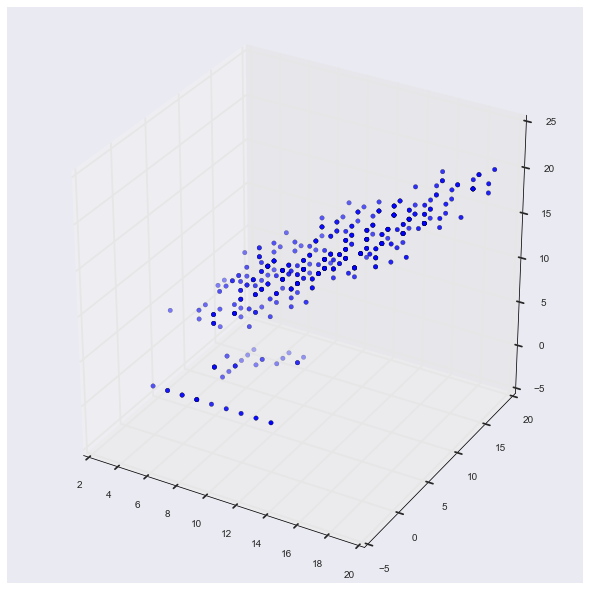

In [22]:
ax = Axes3D(plt.gcf())
ax.scatter(g1, g2, g3)

plt.show()

In [23]:
# The model can predict an answer
print regr.predict([18, 18])

18.6924254918


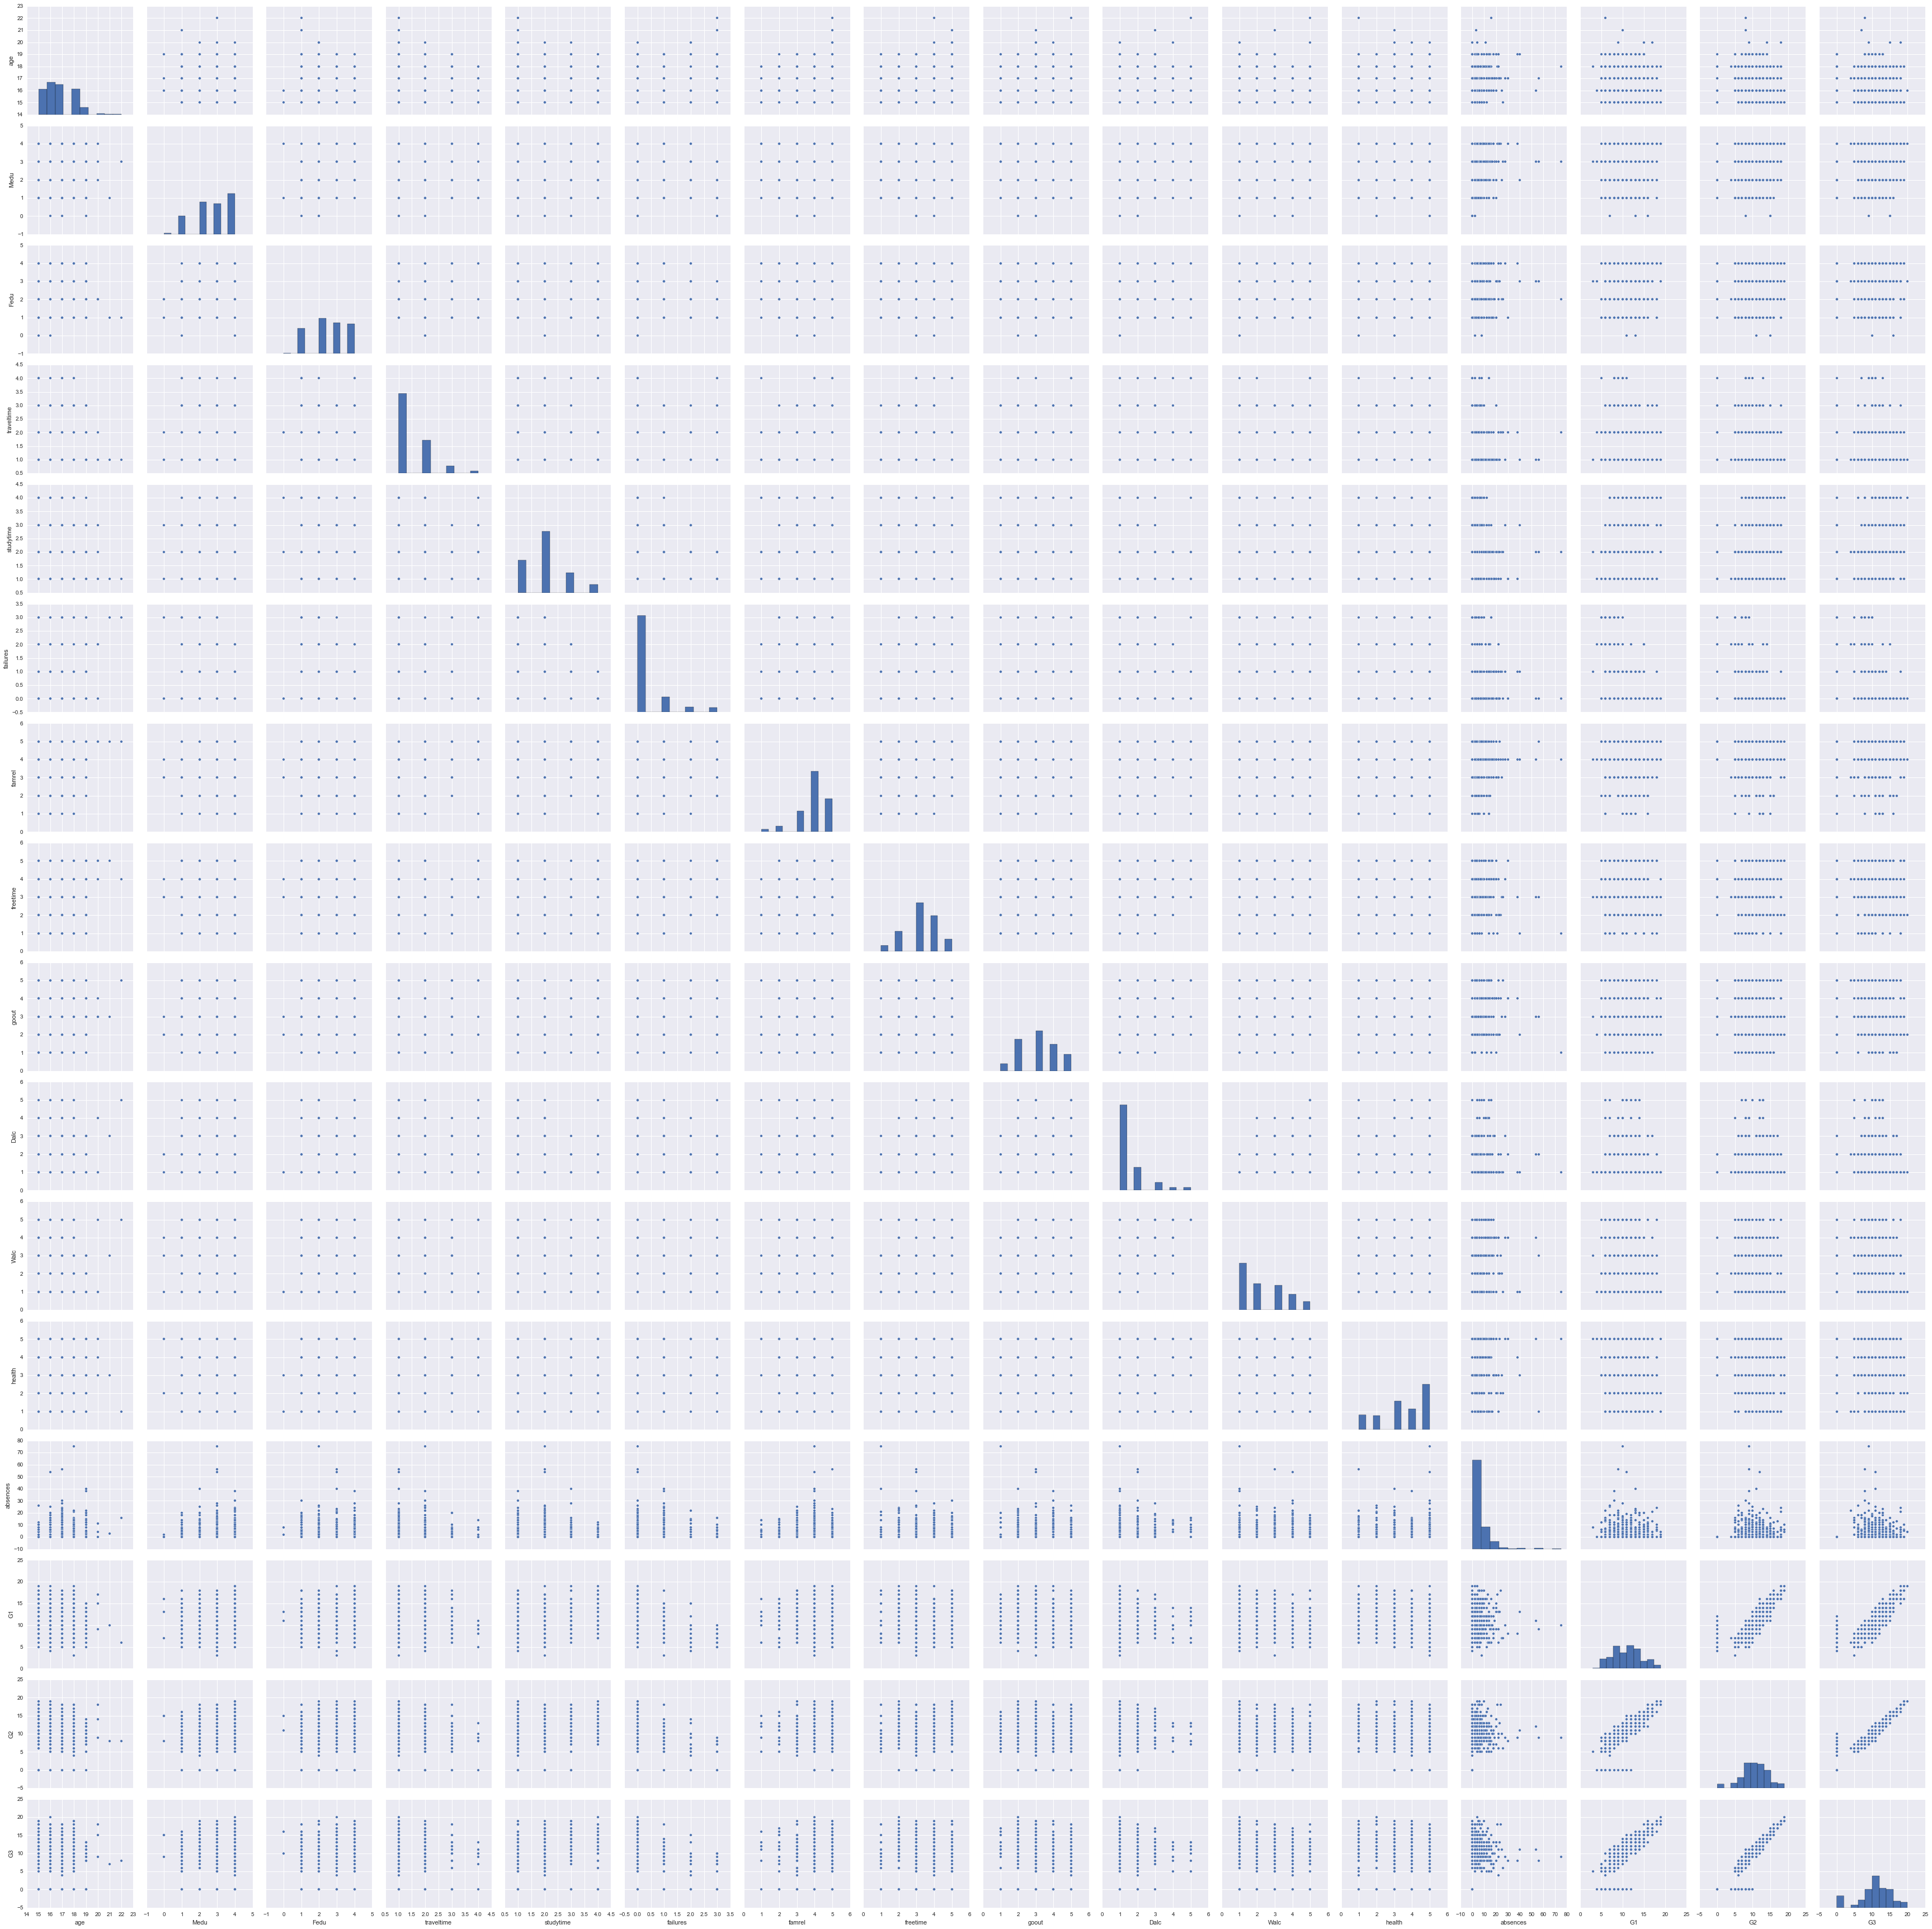

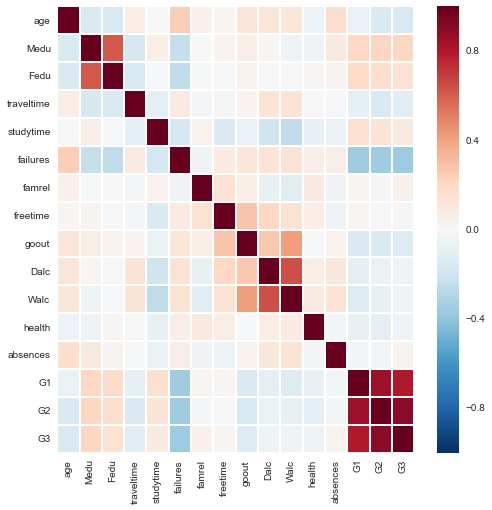

### Citations

> P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.